In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import gensim
from gensim.models import Word2Vec

<h1>Prepare the datasets</h1>

In [2]:
corpus_test = [
    # --- TOPIC 1: FOOD & FRUITS ---
    "I eat mango and apple everyday",
    "Mango is a very sweet and delicious fruit",
    "Apple pie is a tasty dessert",
    "Banana is yellow and good for health",
    "Fruits like mango apple and banana are healthy",
    "I love eating pizza and burger for dinner",
    "Burger is a fast food",
    "Pizza contains cheese and tomato sauce",
    "I am hungry I want to eat food",
    "Restaurant serves delicious meals",
    "Vegetables and fruits are essential for diet",
    "Cook dinner in the kitchen",
    "Sweet desserts like cake and chocolate",
    
    # --- TOPIC 2: SPORTS & GAMES ---
    "Cricket is a popular sport in India",
    "Virat Kohli plays cricket for the team",
    "Football is played with a ball in a stadium",
    "Messi is a famous football player",
    "Players run fast to score a goal",
    "Tennis is played with a racket and ball",
    "The match was played in a big stadium",
    "The team won the championship trophy",
    "Athletes run in the olympics",
    "Bat and ball are used in cricket matches",
    "Score runs to win the cricket game",
    "The referee blew the whistle",

    # --- TOPIC 3: TECHNOLOGY & CODING ---
    "Python is a popular programming language",
    "Computers use binary code to process data",
    "Artificial Intelligence and machine learning are the future",
    "Data science involves statistics and algorithms",
    "Software developers write code in java and python",
    "The computer requires a keyboard and mouse",
    "Internet connects computers globally",
    "Deep learning models use neural networks",
    "Robots are built using engineering and ai",
    "The server stores massive amounts of data",
    "Programmers debug the software code",
    "Technology is advancing rapidly"

]

In [3]:
tokenizer_text = []
for sent in corpus_test:
    tokens = gensim.utils.simple_preprocess(sent)
    tokenizer_text.append(tokens)
tokenizer_text

[['eat', 'mango', 'and', 'apple', 'everyday'],
 ['mango', 'is', 'very', 'sweet', 'and', 'delicious', 'fruit'],
 ['apple', 'pie', 'is', 'tasty', 'dessert'],
 ['banana', 'is', 'yellow', 'and', 'good', 'for', 'health'],
 ['fruits', 'like', 'mango', 'apple', 'and', 'banana', 'are', 'healthy'],
 ['love', 'eating', 'pizza', 'and', 'burger', 'for', 'dinner'],
 ['burger', 'is', 'fast', 'food'],
 ['pizza', 'contains', 'cheese', 'and', 'tomato', 'sauce'],
 ['am', 'hungry', 'want', 'to', 'eat', 'food'],
 ['restaurant', 'serves', 'delicious', 'meals'],
 ['vegetables', 'and', 'fruits', 'are', 'essential', 'for', 'diet'],
 ['cook', 'dinner', 'in', 'the', 'kitchen'],
 ['sweet', 'desserts', 'like', 'cake', 'and', 'chocolate'],
 ['cricket', 'is', 'popular', 'sport', 'in', 'india'],
 ['virat', 'kohli', 'plays', 'cricket', 'for', 'the', 'team'],
 ['football', 'is', 'played', 'with', 'ball', 'in', 'stadium'],
 ['messi', 'is', 'famous', 'football', 'player'],
 ['players', 'run', 'fast', 'to', 'score', 'goa

In [4]:
model = Word2Vec(sentences=tokenizer_text,
                vector_size = 5, #size of vector 
                window = 5, #nearby words that can be considered to be together
                sg = 1,
                min_count=1
                )

<h1>Use the model</h1>

In [5]:
model.wv['java'],model.wv['python']

(array([-0.04328015,  0.17661998, -0.1054906 , -0.16282359,  0.13635515],
       dtype=float32),
 array([0.03245896, 0.00398973, 0.07100908, 0.00287958, 0.19226491],
       dtype=float32))

In [6]:
#most similar words by calculating distance 
model.wv.most_similar('game')

[('computer', 0.9699028730392456),
 ('bat', 0.9519078731536865),
 ('programmers', 0.8746770620346069),
 ('neural', 0.8722389936447144),
 ('involves', 0.8446546196937561),
 ('diet', 0.8056879639625549),
 ('like', 0.795167088508606),
 ('python', 0.7920485734939575),
 ('are', 0.788646936416626),
 ('statistics', 0.7775607109069824)]

In [7]:
cosine_similarity([model.wv['java']],[model.wv['game']])

array([[0.44498086]], dtype=float32)

In [8]:
list1 = ['mango','banana','football']
model.wv.doesnt_match(list1)

'banana'

<h1>Visualization</h1>

In [9]:
words_of_interest = [
    'apple','banana','fruit','burger','pizza',
    'cricket','football','tennis','player','ball',
    'python','java','computer','code','software'
]

In [10]:
vectors = [model.wv[w] for w in words_of_interest]
len(vectors)
vectors

[array([-0.03168083,  0.0064003 , -0.08224421, -0.15476932, -0.03101677],
       dtype=float32),
 array([ 0.10736673,  0.1553745 , -0.11527971,  0.14872085,  0.13219568],
       dtype=float32),
 array([-0.0371276 ,  0.13012205, -0.05391257,  0.09636763,  0.13805556],
       dtype=float32),
 array([ 0.15811308,  0.1190356 , -0.02991295,  0.03000185,  0.03503836],
       dtype=float32),
 array([ 0.1568562 , -0.18950488, -0.00334794,  0.06890613, -0.01837227],
       dtype=float32),
 array([-0.06820968, -0.01848307,  0.11653265, -0.15187551, -0.079815  ],
       dtype=float32),
 array([ 0.14358866,  0.13696167,  0.15301366, -0.0779589 , -0.01237785],
       dtype=float32),
 array([-0.16008462, -0.15256391,  0.05990892, -0.05744571, -0.1384687 ],
       dtype=float32),
 array([-0.16156656,  0.12485383,  0.09745546,  0.0147545 ,  0.06015791],
       dtype=float32),
 array([-0.16402237,  0.09027366, -0.08125302,  0.01400934,  0.16982129],
       dtype=float32),
 array([0.03245896, 0.00398973

In [11]:
vectors = np.array(vectors)
vectors.shape

(15, 5)

In [12]:
#reduce the dimensions to 2
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)
vectors_2d.shape

(15, 2)

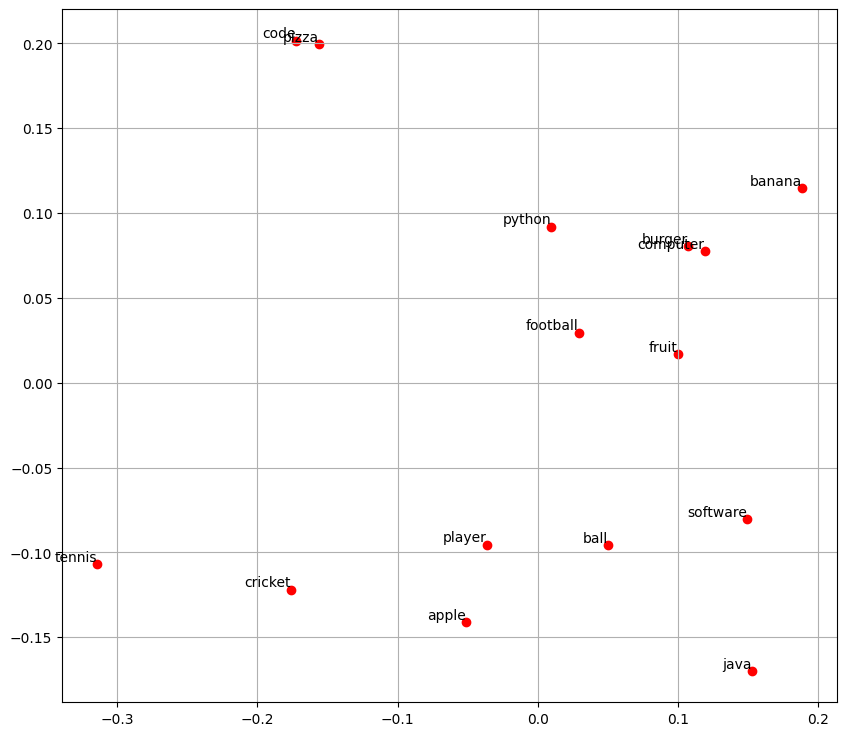

In [13]:
plt.figure(figsize=(10,9))
plt.scatter(vectors_2d[:,0],vectors_2d[:,1],color = 'r')
for i,word in enumerate(words_of_interest):
    plt.annotate(word,xy = (vectors_2d[i,0],vectors_2d[i,1]),
                ha='right',va = 'bottom')
plt.grid()

In [14]:
gensim.__version__

'4.4.0'